# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [112]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

f = open('/content/yearinfo.json')
yearinfo = json.load(f)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [113]:
#creating column for dataframe
column = list(yearinfo['2021'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [114]:
#write your code here
#updating all the data point in the data
data = []
for key, value in yearinfo.items():
    for i in value:
        temp = list(i.values())+[key]
        data.append(temp)

In [115]:
df = pd.DataFrame(data,columns=column)

In [116]:
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [117]:
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [118]:
df.shape

(1200, 7)

In [119]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [120]:
#fetch the list data into useable data
def fetch_list_value(list_name):
    value = list_name[0]
    return value

#datapoints which need to be entered in proper formated value
df['band_singer'] = df.band_singer.map(fetch_list_value)

In [121]:
df.head()

band_singer                                         song  \
0             Kesha                       [/wiki/Tik_Tok_(song)]   
1   Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2      Train (band)                     [/wiki/Hey,_Soul_Sister]   
3        Katy Perry                     [/wiki/California_Gurls]   
4  Usher (musician)                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [122]:
#series selection for ploting graph
#top 20 popular singer
df.value_counts(subset=['band_singer']).loc[lambda x:x > 15]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

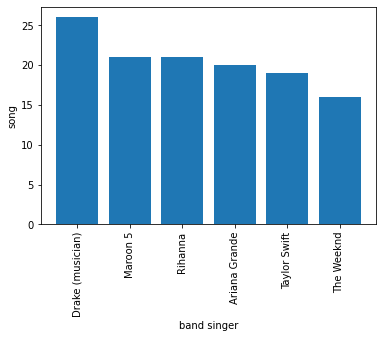

In [123]:
#Write your program and plot bar graph
y = df.band_singer.value_counts().loc[lambda x:x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**


Answer: Drake(musician) is the most profilic singer

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [124]:
#write your code here
#adding score column and datapoint to it
df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                         song  \
0             Kesha                       [/wiki/Tik_Tok_(song)]   
1   Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2      Train (band)                     [/wiki/Hey,_Soul_Sister]   
3        Katy Perry                     [/wiki/California_Gurls]   
4  Usher (musician)                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  score  
0                              [/wiki/Kesha]  2010    100  
1                    [/wiki/Lady_Antebellum]  2010     99  
2                       [/wiki/Train_(band)]  2010     98  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010     97  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010     96

In [125]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
score           int64
dtype: object

In [126]:
group_singer = df.groupby('band_singer').sum(['score'])

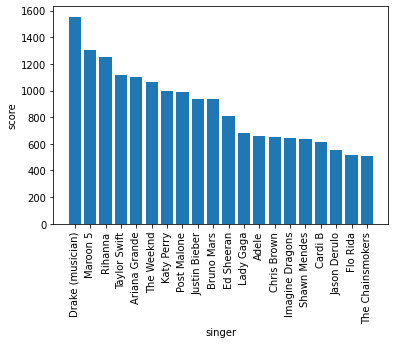

In [127]:
#ploting graph
y = group_singer.score.sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Repeated singer in top 10 ranking in a given year?

The code below will show the ranking below 10 i.e 9,8,7.....1

In [128]:
rankingdf = df.loc[lambda x:df['ranking']<=10]
rankingdf

band_singer                                         song  \
0                Kesha                       [/wiki/Tik_Tok_(song)]   
1      Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2         Train (band)                     [/wiki/Hey,_Soul_Sister]   
3           Katy Perry                     [/wiki/California_Gurls]   
4     Usher (musician)                     [/wiki/OMG_(Usher_song)]   
...                ...                                          ...   
1105          Doja Cat                         [/wiki/Kiss_Me_More]   
1106        Silk Sonic                  [/wiki/Leave_the_Door_Open]   
1107    Olivia Rodrigo               [/wiki/Drivers_License_(song)]   
1108         Lil Nas X       [/wiki/Montero_(Call_Me_by_Your_Name)]   
1109     Justin Bieber         [/wiki/Peaches_(Justin_Bieber_song)]   

                                    songurl  ranking  \
0                          [Tik Tok (song)]        1   
1     [Need You Now (Lady Antebellum song)]        2   
2                        [Hey, Soul Sister]        3   
3                        [California Gurls]        4   
4                        [OMG (Usher song)]        5   
...                                     ...      ...   
1105                         [Kiss Me More]        6   
1106                  [Leave the Door Open]        7   
1107               [Drivers License (song)]        8   
1108       [Montero (Call Me by Your Name)]        9   
1109         [Peaches (Justin Bieber song)]       10   

                             titletext  \
0                            "Tik Tok"   
1                       "Need You Now"   
2                   "Hey, Soul Sister"   
3                   "California Gurls"   
4                                "OMG"   
...                                ...   
1105                    "Kiss Me More"   
1106             "Leave the Door Open"   
1107                 "Drivers License"   
1108  "Montero (Call Me by Your Name)"   
1109                         "Peaches"   

                                                    url  year  score  
0                                         [/wiki/Kesha]  2010    100  
1                               [/wiki/Lady_Antebellum]  2010     99  
2                                  [/wiki/Train_(band)]  2010     98  
3                  [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010     97  
4             [/wiki/Usher_(musician), /wiki/Will.i.am]  2010     96  
...                                                 ...   ...    ...  
1105                        [/wiki/Doja_Cat, /wiki/SZA]  2021     95  
1106  [/wiki/Silk_Sonic, /wiki/Bruno_Mars, /wiki/And...  2021     94  
1107                             [/wiki/Olivia_Rodrigo]  2021     93  
1108                                  [/wiki/Lil_Nas_X]  2021     92  
1109  [/wiki/Justin_Bieber, /wiki/Daniel_Caesar, /wi...  2021     91  

[120 rows x 8 columns]

In [131]:
rank = df.groupby('year')
result = rank.get_group('2021').band_singer.value_counts()[:10]

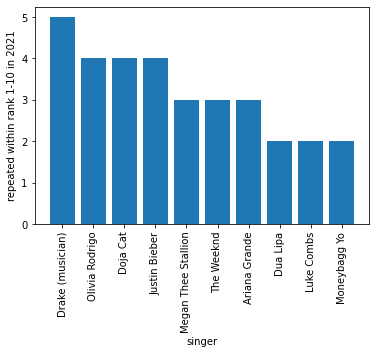

In [130]:
#ploting graph
y = result
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('repeated within rank 1-10 in 2021')
plt.show()

The graphs shows the frequency of the particular singer ranked top 1 to 10 in billboard 2021.( Drake ranked 5 times between top 1 to 10 in billboard 2021)